# Data Visualization

## Example Figure 9.1 Chebyshev Basis Polynomials

In [1]:
import numpy as np
from matplotlib import pyplot as plt

T = np.polynomial.Chebyshev.basis
x = np.linspace(-1, 1, 200)
for n in range(9):
    plt.plot(x, T(n)(x), label="n = "+str(n))
    
plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.legend(loc="right")

## Problem 2 Bernstein Basis Polynomials

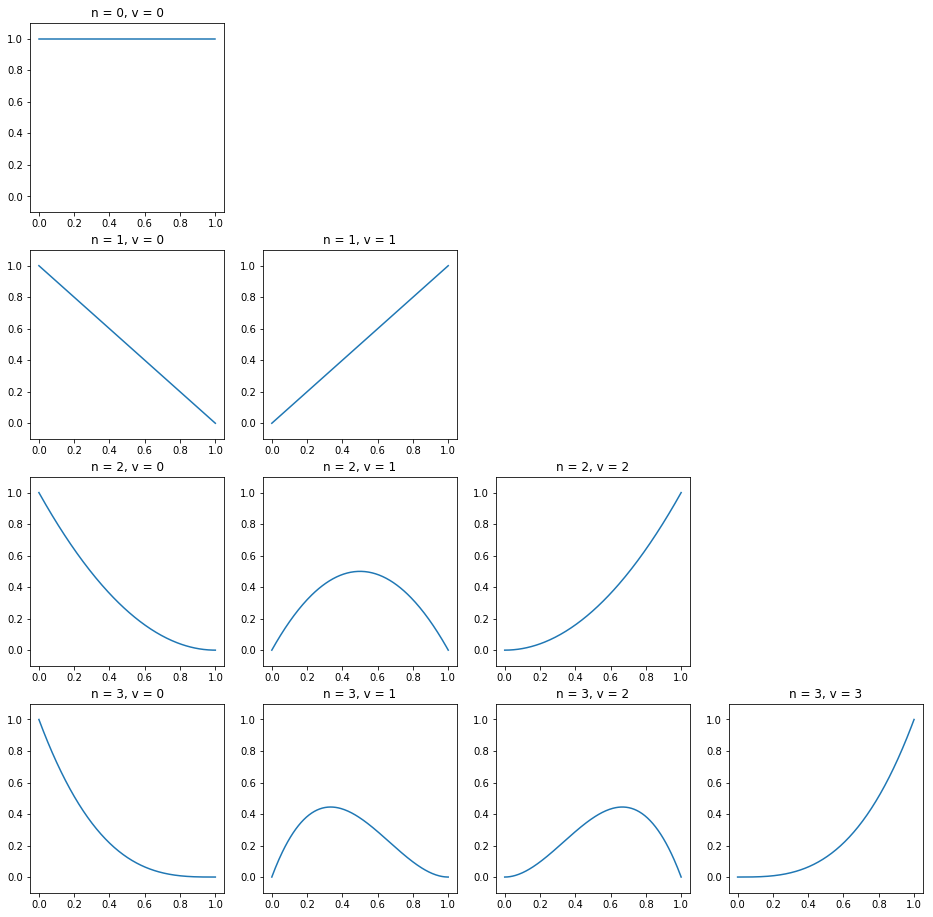

In [2]:
from scipy import special
x = np.linspace(0, 1, 200)
fig = plt.figure(figsize = [16, 16])

for n in range(4):
    for v in range(n+1):
        sub = fig.add_subplot(4, 4, 4*n+v+1)
        binom = special.binom(n,v)
        sub.plot(x, binom*x**v*(1-x)**(n-v))
        plt.title("n = "+str(n)+", v = "+str(v))
        plt.ylim([-0.1,1.1])

## Problem 3

Text(0, 0.5, 'Weight (pound)')

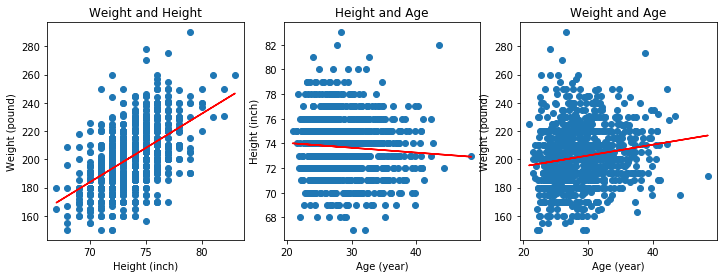

In [3]:
mlb = np.load('MLB.npy')
fig = plt.figure(figsize = [12, 4])

# correlations between weight and height
corwh = fig.add_subplot(1, 3, 1)
corwh.scatter(mlb[:,0], mlb[:,1], marker='o')
fit = np.polyfit(mlb[:,0],mlb[:,1],1)
fit_fn = np.poly1d(fit) 
corwh.plot(mlb[:,0], fit_fn(mlb[:,0]), color='red')
plt.title("Weight and Height")
plt.xlabel("Height (inch)")
plt.ylabel("Weight (pound)")

# correlations between height and age
corha = fig.add_subplot(1, 3, 2)
corha.scatter(mlb[:,2], mlb[:,0], marker='o')
fit = np.polyfit(mlb[:,2],mlb[:,0],1)
fit_fn = np.poly1d(fit) 
corha.plot(mlb[:,2], fit_fn(mlb[:,2]), color='red')
plt.title("Height and Age")
plt.xlabel("Age (year)")
plt.ylabel("Height (inch)")

# correlations between weight and age
corwa = fig.add_subplot(1, 3, 3)
corwa.scatter(mlb[:,2], mlb[:,1], marker='o')
fit = np.polyfit(mlb[:,2],mlb[:,1],1)
fit_fn = np.poly1d(fit) 
corwa.plot(mlb[:,2], fit_fn(mlb[:,2]), color='red')
plt.title("Weight and Age")
plt.xlabel("Age (year)")
plt.ylabel("Weight (pound)")

## Problem 5 Visualize the Rosenbrock Function

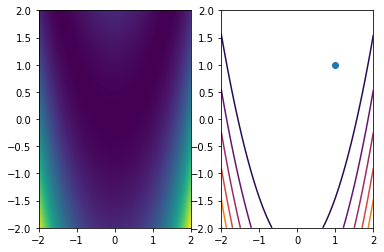

In [4]:
# Construct a 2-D domain with np.meshgrid() and calculate f on the domain.
x = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, x)
Z = (1 - X) ** 2 + 100 * (Y - X ** 2) ** 2

# Plot f using a heat map and a contour map
fig, ax = plt.subplots(1, 2)
ax[0].pcolormesh(X, Y, Z, cmap="viridis") # Heat map.
ax[1].contour(X, Y, Z, 6, cmap="inferno") # Contour map.
plt.plot(1, 1, marker = 'o')

## Problem 6

Text(0.5, 1.0, 'Bar Plot for GDP per Capita')

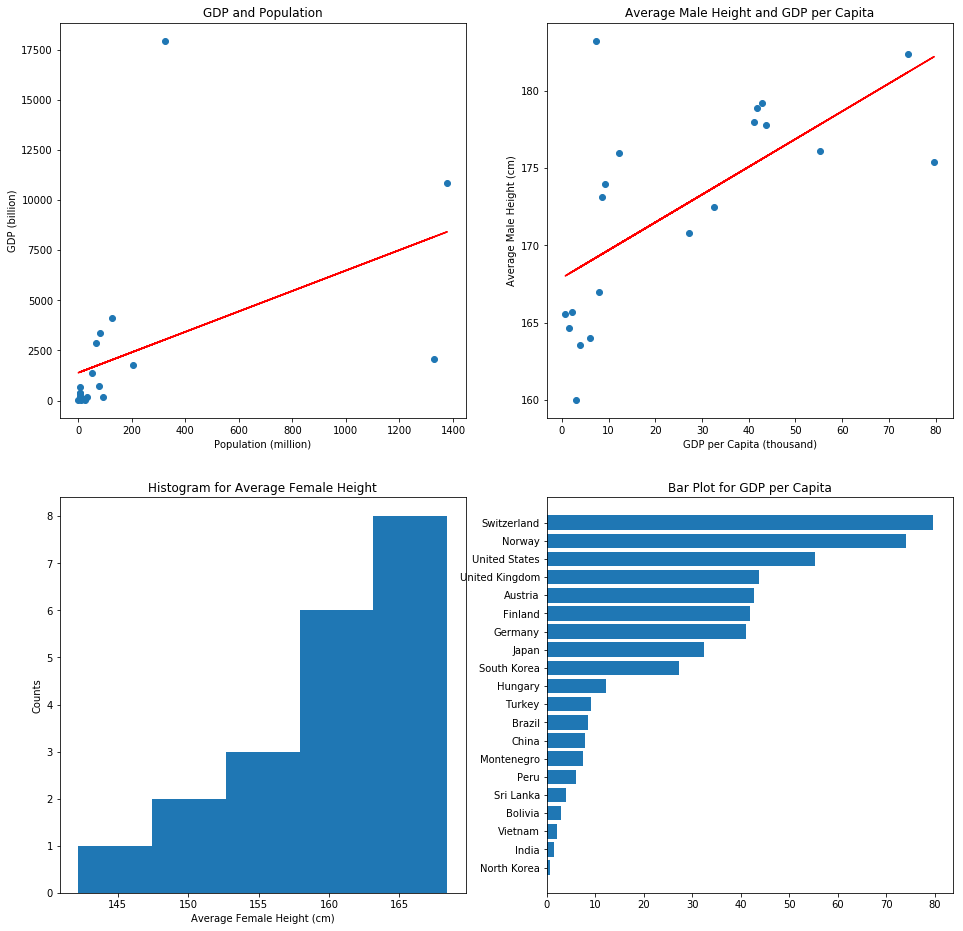

In [5]:
countries = np.load('countries.npy')
fig = plt.figure(figsize = [16, 16])

# scatter plot between GDP and population
gdppop = fig.add_subplot(2, 2, 1)
gdppop.scatter(countries[:,0], countries[:,1], marker='o')
fit = np.polyfit(countries[:,0],countries[:,1],1)
fit_fn = np.poly1d(fit) 
gdppop.plot(countries[:,0],fit_fn(countries[:,0]), color='red')
plt.title("GDP and Population")
plt.xlabel("Population (million)")
plt.ylabel("GDP (billion)")

# define GDP per capita
pgdp = countries[:,1]/countries[:,0]
pgdp.shape = (20,1)
countries = np.append(countries, pgdp, 1)

# scatter plot between male height and GDP per capita
mhpgdp = fig.add_subplot(2, 2, 2)
mhpgdp.scatter(countries[:,4], countries[:,2], marker='o')
fit = np.polyfit(countries[:,4], countries[:,2],1)
fit_fn = np.poly1d(fit) 
mhpgdp.plot(countries[:,4], fit_fn(countries[:,4]),color='red')
plt.title("Average Male Height and GDP per Capita")
plt.xlabel("GDP per Capita (thousand)")
plt.ylabel("Average Male Height (cm)")

# histogram for female height
histfh = fig.add_subplot(2, 2, 3)
histfh.hist(countries[:,3],bins=5)
plt.title("Histogram for Average Female Height")
plt.xlabel("Average Female Height (cm)")
plt.ylabel("Counts")


# bar plot for GDP per capita
labels = ["Austria", "Bolivia", "Brazil", "China",
          "Finland", "Germany", "Hungary", "India",
          "Japan", "North Korea", "Montenegro", "Norway",
          "Peru", "South Korea", "Sri Lanka", "Switzerland",
          "Turkey", "United Kingdom", "United States", "Vietnam"]
values = countries[:,4]
positions = np.arange(len(labels))
idx = np.argsort(values)
labels = [labels[i] for i in idx]

barpdgp = fig.add_subplot(2, 2, 4)
barpdgp.barh(positions, values[idx], align="center")
plt.yticks(positions, labels)
plt.title("Bar Plot for GDP per Capita")